In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp311-cp311-macosx_10_9_x86_64.whl (19.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Будем визулизировать данные этой библиотекой
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [3]:

from sklearn.preprocessing import StandardScaler # Масштабирование данных
from keras.models import load_model

2023-08-18 02:08:29.614187: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, MaxPooling1D, Conv1D, Flatten, Dropout, BatchNormalization, Input, Embedding, SpatialDropout1D, concatenate, Concatenate, Activation
from keras.optimizers import Adam, Adadelta, SGD
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras import datasets, layers, models, losses
from keras.utils import load_img, to_categorical, plot_model
from sklearn.model_selection import train_test_split

In [2]:
import re
from tabulate import tabulate

In [3]:
pd.set_option("display.max_columns", 100)

### Загрузка баз

### 1. Загрузка второй базы

#### Загрузка 1-го класса

In [9]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/2624_res_1018_КИ_online_new.csv'
df1_1 = pd.read_csv(path, low_memory=False, header=2)
# Добавление столбца метки класса 0
df1_1.insert (loc= len(df1_1.columns) , column='Client_class', value=0)
df1_1.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,10/17/2022,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.00,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.000,141531.65,0,0,NaN,0,1/15/2015,8/16/2022,0.0,0,0,0.0,0,0,0,NaN,0,NaN,Банк,0.00,1/15/2015,NaN,ПоОсновномуДолгу,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,10/17/2022,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.00,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.000,268860.28,0,0,NaN,0,6/18/2018,6/20/2018,0.0,0,0,0.0,0,0,0,NaN,0,NaN,Банк,3240.15,6/18/2018,NaN,ПоОсновномуДолгу,168000.00,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,10/17/2022,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0,0,NaN,0,12/17/2015,12/30/2015,0.0,0,0,0.0,0,0,0,NaN,0,NaN,Банк,0.00,12/17/2015,NaN,ПоОсновномуДолгу,29356.04,False,0
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,10/17/2022,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.00,RUB,Потребительский,СчетЗакрыт,11/14/2016,NaN,0.000,0.00,0,0,NaN,0,10/13/2016,10/13/2016,0.0,0,0,0.0,0,0,0,NaN,0,NaN,Банк,1157.42,10/13/2016,NaN,ПоОсновномуДолгу,0.00,False,0
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,10/17/2022,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.00,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,NaN,29.768,186130.59,0,0,NaN,0,8/16/2021,10/1/2021,0.0,0,0,0.0,0,0,0,NaN,0,NaN,Банк,0.00,10/1/2021,NaN,ПоОсновномуДолгу,128642.19,False,0


In [11]:
df1_1.shape

(146090, 46)

In [10]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/2624_res_5000_КИ_оффлайн_new.csv'
df1_2 = pd.read_csv(path, low_memory=False, header=2)
# Добавление столбца метки класса 0
df1_2.insert (loc= len(df1_2.columns) , column='Client_class', value=0)
df1_2.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,10/11/2022,10/20/2022,Коми республика,г. Печора,40653.0,6/18/1988,Мужской,СреднеТехническое,рабочий,10/11/2022,1ffbd51b-4971-11ed-b80c-3cfdfed12971,4/23/2013,94000.0,RUB,КредитнаяКарта,ПереданНаОбслуживаниеВДругуюОрганизацию,10/11/2016,NaN,56.728,152405.32,0.0,0.0,NaN,0.0,8/12/2016,12/1/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,73334.86,11/28/2019,NaN,ПоОсновномуДолгу,109513.29,False,0
1,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,10/11/2022,10/20/2022,Коми республика,г. Печора,40653.0,6/18/1988,Мужской,СреднеТехническое,рабочий,10/11/2022,1ffbd51b-4971-11ed-b80c-3cfdfed12971,12/26/2015,3000.0,RUB,Микрокредит,СчетЗакрыт,2/7/2016,NaN,0.000,5523.61,0.0,0.0,NaN,0.0,1/17/2016,1/17/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0.00,1/17/2016,NaN,ПоОсновномуДолгу,3000.00,False,0
2,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,10/11/2022,10/20/2022,Коми республика,г. Печора,40653.0,6/18/1988,Мужской,СреднеТехническое,рабочий,10/11/2022,1ffbd51b-4971-11ed-b80c-3cfdfed12971,12/6/2015,2000.0,RUB,Микрокредит,СчетЗакрыт,12/27/2015,NaN,0.000,3848.00,0.0,0.0,NaN,0.0,12/26/2015,12/26/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0.00,12/26/2015,NaN,ПоОсновномуДолгу,2000.00,False,0
3,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,10/11/2022,10/20/2022,Коми республика,г. Печора,40653.0,6/18/1988,Мужской,СреднеТехническое,рабочий,10/11/2022,1ffbd51b-4971-11ed-b80c-3cfdfed12971,1/17/2016,4000.0,RUB,Микрокредит,СчетЗакрыт,2/7/2016,NaN,0.000,7079.60,0.0,0.0,NaN,0.0,2/8/2016,2/8/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0.00,2/8/2016,NaN,ПоОсновномуДолгу,4000.00,False,0
4,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,10/11/2022,10/20/2022,Коми республика,г. Печора,40653.0,6/18/1988,Мужской,СреднеТехническое,рабочий,10/11/2022,1ffbd51b-4971-11ed-b80c-3cfdfed12971,2/8/2016,4000.0,RUB,Микрокредит,СчетЗакрыт,3/9/2016,NaN,777.450,13525.72,0.0,0.0,NaN,0.0,12/31/2019,11/20/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,4000.00,12/31/2019,NaN,ПоОсновномуДолгу,4000.00,False,0


In [12]:
df1_2.shape

(95067, 46)

In [13]:
df1=pd.concat([df1_1, df1_2], ignore_index=True)

In [14]:
df1.shape

(241157, 46)

In [15]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df1['dt_nbki'] = pd.to_datetime(df1['dt_nbki'])
df1 = df1[df1['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [16]:
df1.shape

(241157, 46)

In [17]:
df1.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.00,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.000,141531.65,0.0,0.0,NaN,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.00,1/15/2015,NaN,ПоОсновномуДолгу,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.00,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.000,268860.28,0.0,0.0,NaN,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,0.0,NaN,Банк,3240.15,6/18/2018,NaN,ПоОсновномуДолгу,168000.00,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0.0,0.0,NaN,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.00,12/17/2015,NaN,ПоОсновномуДолгу,29356.04,False,0
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.00,RUB,Потребительский,СчетЗакрыт,11/14/2016,NaN,0.000,0.00,0.0,0.0,NaN,0.0,10/13/2016,10/13/2016,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,0.0,NaN,Банк,1157.42,10/13/2016,NaN,ПоОсновномуДолгу,0.00,False,0
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.00,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,NaN,29.768,186130.59,0.0,0.0,NaN,0.0,8/16/2021,10/1/2021,0.0,0.0,0.0,0.00,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.00,10/1/2021,NaN,ПоОсновномуДолгу,128642.19,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241152,49a15fe3-1c36-4321-a4d4-24e390f8c089,4bc7cbee-4ecc-11ed-b81f-3cfdfed12dbd,10/18/2022,11/19/2022,Ленинградская область,г.Всеволожск,67911.0,6/5/1953,Женский,Среднее,пенсионер,2022-10-18,060722f6-4ecd-11ed-b80c-3cfdfed12971,10/24/2013,270000.00,RUB,КредитНаличнымиНецелевой,ПередачаДанныхПрекращена,12/24/2016,NaN,0.000,198418.73,0.0,0.0,NaN,0.0,11/3/2015,8/3/2017,0.0,0.0,0.0,142441.66,0.0,0.0,0.0,NaN,0.0,NaN,Банк,154625.49,7/1/2017,NaN,ПоОсновномуДолгу,127558.34,False,0
241153,49a15fe3-1c36-4321-a4d4-24e390f8c089,4bc7cbee-4ecc-11ed-b81f-3cfdfed12dbd,10/18/2022,11/19/2022,Ленинградская область,г.Всеволожск,67911.0,6/5/1953,Женский,Среднее,пенсионер,2022-10-18,060722f6-4ecd-11ed-b80c-3cfdfed12971,3/5/2016,0.00,RUB,КредитнаяКарта,СчетЗакрыт,7/13/2021,NaN,25.530,41935.01,0.0,0.0,NaN,0

In [18]:
# выгрузка датасета
df1.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df1_cutted.scv', index=False)

#### Загрузка 2-го класса

In [20]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/Class_2_new.csv'
df2 = pd.read_csv(path, low_memory=False, header=2)
# Добавление столбца метки класса 1
df2.insert (loc= len(df2.columns) , column='Client_class', value=1)
df2.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,dat_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,10/20/2022,e66f2486-5090-11ed-80cf-f4034344a6bd,7/16/2018,69325,RUB,КредитнаяКарта,Просрочен,NaN,NaN,0,0,0.0,0.0,240 и более,0.0,1/31/1900,10/11/2022,0,0.0,0.0,69325,0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,69325,7/16/2018,NaN,ПоОсновномуДолгу,0,False,1
1,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,10/20/2022,e66f2486-5090-11ed-80cf-f4034344a6bd,8/18/2014,"217308,26",RUB,КредитНаличнымиНецелевой,Просрочен,NaN,NaN,0,"694,59",0.0,0.0,150-179,0.0,10/21/2021,10/3/2022,0,0.0,0.0,"216613,67",0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,"216613,67",12/26/2021,NaN,ПоОсновномуДолгу,"694,59",False,1
2,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,10/20/2022,e66f2486-5090-11ed-80cf-f4034344a6bd,3/27/2021,"1666,66",RUB,Микрокредит,СчетЗакрыт,9/23/2021,NaN,"349,92","1666,66",0.0,0.0,NaN,0.0,4/12/2021,4/13/2021,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/12/2021,NaN,ПоОсновномуДолгу,"1666,66",False,1
3,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,10/20/2022,e66f2486-5090-11ed-80cf-f4034344a6bd,4/22/2021,8740,RUB,Микрокредит,Просрочен,10/19/2021,NaN,"348,96","5257,24",0.0,0.0,240 и более,0.0,7/24/2021,8/1/2022,0,0.0,0.0,"8617,29",0.0,0.0,0.0,NaN,0.0,NaN,МФО,"8617,29",5/22/2021,NaN,ПоОсновномуДолгу,"122,71",False,1
4,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,10/20/2022,e66f2486-5090-11ed-80cf-f4034344a6bd,4/15/2021,6000,RUB,Микрокредит,Просрочен,6/5/2021,NaN,365,4480,0.0,0.0,240 и более,0.0,5/15/2021,9/24/2022,0,0.0,0.0,3320,0.0,0.0,0.0,NaN,0.0,NaN,МФО,3320,1/31/2022,NaN,ПоОсновномуДолгу,2680,False,1


In [21]:
df2.shape # Проверяем размерность до обрезки

(34436, 46)

In [22]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df2['dt_nbki'] = pd.to_datetime(df2['dt_nbki'])
df2 = df2[df2['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [23]:
df2.shape   # Размерность не изменилась

(34436, 46)

In [26]:
df2.rename(columns={'dat_of_birth': 'date_of_birth'}, inplace=True)

In [27]:
df2.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,7/16/2018,69325,RUB,КредитнаяКарта,Просрочен,NaN,NaN,0,0,0.0,0.0,240 и более,0.0,1/31/1900,10/11/2022,0,0.0,0.0,69325,0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,69325,7/16/2018,NaN,ПоОсновномуДолгу,0,False,1
1,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,8/18/2014,"217308,26",RUB,КредитНаличнымиНецелевой,Просрочен,NaN,NaN,0,"694,59",0.0,0.0,150-179,0.0,10/21/2021,10/3/2022,0,0.0,0.0,"216613,67",0.0,0.0,0.0,NaN,0.0,NaN,Коллекторы,"216613,67",12/26/2021,NaN,ПоОсновномуДолгу,"694,59",False,1
2,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,3/27/2021,"1666,66",RUB,Микрокредит,СчетЗакрыт,9/23/2021,NaN,"349,92","1666,66",0.0,0.0,NaN,0.0,4/12/2021,4/13/2021,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/12/2021,NaN,ПоОсновномуДолгу,"1666,66",False,1
3,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,4/22/2021,8740,RUB,Микрокредит,Просрочен,10/19/2021,NaN,"348,96","5257,24",0.0,0.0,240 и более,0.0,7/24/2021,8/1/2022,0,0.0,0.0,"8617,29",0.0,0.0,0.0,NaN,0.0,NaN,МФО,"8617,29",5/22/2021,NaN,ПоОсновномуДолгу,"122,71",False,1
4,0028fdd6-52ba-4d2c-8ec1-4bfdb3d9f116,a6317d7c-5090-11ed-b80c-3cfdfed12971,10/20/2022,12/2/2022,Башкортостан республика,г. Кармаскалы,8540.0,1/16/1983,Мужской,СреднеТехническое,рабочий,2022-10-20,e66f2486-5090-11ed-80cf-f4034344a6bd,4/15/2021,6000,RUB,Микрокредит,Просрочен,6/5/2021,NaN,365,4480,0.0,0.0,240 и более,0.0,5/15/2021,9/24/2022,0,0.0,0.0,3320,0.0,0.0,0.0,NaN,0.0,NaN,МФО,3320,1/31/2022,NaN,ПоОсновномуДолгу,2680,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34431,ff6368d8-4470-4c11-b458-b28f70b8a82f,cf08ce21-508b-11ed-80cf-f4034344a6bd,10/20/2022,1/24/2023,Московская область,г. Волоколамск,19824.0,4/6/1982,Мужской,СреднеТехническое,военнослужащий,2022-10-20,056c65f3-508c-11ed-b80c-3cfdfed12971,10/28/2021,"0,1",RUB,КредитнаяКарта,Активный,10/28/2031,NaN,0,0,0.0,0.0,NaN,0.0,1/31/1900,10/17/2022,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0,10/28/2021,NaN,ПоОсновномуДолгу,0,False,1
34432,ff6368d8-4470-4c11-b458-b28f70b8a82f,cf08ce21-508b-11ed-80cf-f4034344a6bd,10/20/2022,1/24/2023,Московская область,г. Волоколамск,19824.0,4/6/1982,Мужской,СреднеТехническое,военнослужащий,2022-10-20,056c65f3-508c-11ed-b80c-3cfdfed12971,10/10/2022,8500,RUB,Микрокредит,СчетЗакрыт,4/8/2023,NaN,356,12000,0.0,0.0,NaN,0.0,10/11/2022,10/12/2022,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,10/11/2022,NaN,ПоОсновномуДолгу,8500,False,1
3443

In [45]:
# выгрузка датасета
df2.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df2_cutted.scv', index=False)

#### Загрузка 3-го класса

In [29]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/Class_3_new.csv'
df3 = pd.read_csv(path, low_memory=False, header=2)
# Добавление столбца метки класса 2
df3.insert (loc= len(df3.columns) , column='Client_class', value=2)
df3.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,10/11/2022,72509d02-4970-11ed-b80c-3cfdfed12971,3/2/2020,2000,RUB,Микрокредит,СчетЗакрыт,3/23/2020,NaN,0,2000,0.0,0.0,NaN,0.0,3/24/2020,3/24/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,3/24/2020,NaN,ПоОсновномуДолгу,2000,False,2
1,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,10/11/2022,72509d02-4970-11ed-b80c-3cfdfed12971,3/5/2020,3000,RUB,Микрокредит,СчетЗакрыт,3/26/2020,NaN,365,3000,0.0,0.0,NaN,0.0,3/24/2020,3/25/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,3/24/2020,NaN,ПоОсновномуДолгу,3000,False,2
2,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,10/11/2022,72509d02-4970-11ed-b80c-3cfdfed12971,4/2/2020,4000,RUB,Микрокредит,СчетЗакрыт,4/23/2020,NaN,361,4831,0.0,0.0,NaN,0.0,4/23/2020,4/23/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,4/23/2020,NaN,ПоОсновномуДолгу,4000,False,2
3,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,10/11/2022,72509d02-4970-11ed-b80c-3cfdfed12971,4/24/2020,6500,RUB,Микрокредит,СчетЗакрыт,6/25/2020,NaN,361,7851,0.0,0.0,NaN,0.0,6/19/2020,6/19/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,6/19/2020,NaN,ПоОсновномуДолгу,6500,False,2
4,04f66398-c5a1-4664-9e37-ad3db7c88d2f,e5a0c98d-496f-11ed-b81f-3cfdfed12dbd,10/11/2022,5/27/2023,Карелия республика,г. Олонец,8249,2/7/1983,Мужской,СреднеТехническое,сотрудники крупного бизнеса,10/11/2022,72509d02-4970-11ed-b80c-3cfdfed12971,7/7/2020,3000,RUB,Микрокредит,СчетЗакрыт,7/17/2020,NaN,361,3297,0.0,0.0,NaN,0.0,7/16/2020,7/16/2020,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,7/16/2020,NaN,ПоОсновномуДолгу,3000,False,2


In [30]:
df3.shape

(6185, 46)

In [31]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df3['dt_nbki'] = pd.to_datetime(df3['dt_nbki'])
df3 = df3[df3['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [32]:
df3.shape

(6185, 46)

In [44]:
# выгрузка датасета
df3.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df3_cutted.scv', index=False)

#### Загрузка 4-го класса

In [35]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/Class_4_new.csv'
df4 = pd.read_csv(path, low_memory=False, header=2)
# Добавление столбца метки класса 3
df4.insert (loc= len(df4.columns) , column='Client_class', value=3)
df4.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,001a8d7d-8ee4-11e7-80ba-b1d4fc2e9c48,5ea2c91f-4d46-11ed-b80c-3cfdfed12971,10/16/2022,NaN,Крым республика,г. Алушта,29963.0,7/22/1982,Мужской,Среднее,военнослужащий,10/16/2022,a9e07a5c-4d46-11ed-b80c-3cfdfed12971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,10/13/2022,9f70615d-4b07-11ed-b80c-3cfdfed12971,2/10/2015,87343,RUB,Потребительский,СчетЗакрыт,2/11/2019,NaN,0,0,0.0,0.0,NaN,0.0,12/10/2018,12/10/2018,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,"21293,61",12/10/2018,NaN,ПоОсновномуДолгу,0,False,3
2,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,10/13/2022,9f70615d-4b07-11ed-b80c-3cfdfed12971,8/3/2015,5279,RUB,Микрокредит,СчетЗакрыт,1/18/2016,NaN,0,7585,0.0,0.0,NaN,0.0,1/13/2016,1/16/2016,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,МФО,0,1/13/2016,NaN,ПоОсновномуДолгу,5279,False,3
3,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,10/13/2022,9f70615d-4b07-11ed-b80c-3cfdfed12971,4/9/2011,35800,RUB,КредитнаяКарта,ПереданНаОбслуживаниеВДругуюОрганизацию,NaN,NaN,0,0,0.0,0.0,NaN,0.0,5/5/2015,4/1/2018,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,"35783,2",3/22/2017,NaN,ПоОсновномуДолгу,0,False,3
4,001eb691-c1fb-11e6-80b9-b10e998925b8,3656989e-4b07-11ed-b80c-3cfdfed12971,10/13/2022,NaN,Карелия республика,г. Кемь,11969.0,8/18/1984,Женский,Среднее,прочее,10/13/2022,9f70615d-4b07-11ed-b80c-3cfdfed12971,1/10/2017,"174654,42",RUB,КредитНаличнымиНецелевой,СчетЗакрыт,12/10/2018,NaN,"27,892","246267,04",0.0,0.0,NaN,0.0,12/10/2018,12/14/2018,0,0.0,0.0,0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,"42085,88",12/10/2018,NaN,ПоОсновномуДолгу,"174654,42",False,3


In [36]:
df4.shape

(53180, 46)

In [37]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df4['dt_nbki'] = pd.to_datetime(df4['dt_nbki'])
df4 = df4[df4['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [38]:
df4.shape

(53180, 46)

In [43]:
# выгрузка датасета
df4.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df4_cutted.scv', index=False)

In [40]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(241157, 46)
(34436, 46)
(6185, 46)
(53180, 46)


### Загрузка третьей базы
#### Загрузка 1-го класса

In [69]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/1_class_new.csv'
df5 = pd.read_csv(path, low_memory=False, nrows=186021)
# Добавление столбца метки класса 
df5.insert (loc= len(df5.columns) , column='Client_class', value=0)
df5.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Client_class
0,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-10-18 00:00:00.000,25000.0,RUB,Микрокредит,Активный,2021-11-19 00:00:00.000,2021-11-19 00:00:00.000,200.75,0.0,29400.0,0.0,0,29400.0,1900-01-02 00:00:00.000,2021-10-19 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-10-18 00:00:00.000,2021-10-18 00:00:00.000,0.0,False,0
1,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2017-09-27 00:00:00.000,331710.0,RUB,Потребительский,СчетЗакрыт,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,19.00,474295.0,0.0,0.0,1111111111111111111111111111111111111111111111110,0.0,2021-09-27 00:00:00.000,2021-09-28 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,415008.0,0.0,0001-01-01 00:00:00.000,Банк,0.0,2021-09-27 00:00:00.000,2021-09-27 00:00:00.000,0.0,False,0
2,00022adb-a945-47f4-a3a4-4452f0d9c0c8,a54aeee0-442b-11eb-b81d-3cfdfed12dbd,Оффлайн,2020-12-22,2020-12-30,Архангельская область,рп. Коноша,11103.0,1976-09-06,Мужской,Среднее,руководитель,2021-10-27,c12a725c-3704-11ec-80cf-f4034344a6bd,2021-08-20 00:00:00.000,28840.0,RUB,Микрокредит,СчетЗакрыт,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,255.50,31263.0,0.0,0.0,10,0.0,2021-09-01 00:00:00.000,2021-09-02 00:00:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001-01-01 00:00:00.000,МФО,0.0,2021-09-01 00:00:00.000,2021-09-01 00:00:00.000,0.0,False,0


In [70]:
df5.shape

(186021, 45)

In [71]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df5['dt_nbki'] = pd.to_datetime(df5['dt_nbki'])
df5 = df5[df5['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [72]:
df5.shape

(186021, 45)

In [73]:
# выгрузка датасета
df5.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df5_cutted.scv', index=False)

#### Загрузка 2-го класса

In [49]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/2class_new.xlsx'
df6 = pd.read_excel(path)
# Добавление столбца метки класса 1
df6.insert (loc= len(df6.columns) , column='Client_class', value=1)
df6.head(3)

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2019-09-05,4680.0,RUB,Потребительский,СчетЗакрыт,2020-09-11 00:00:00,1899-12-29,17.068,5072.41,0.0,0.0,NaN,0.0,2020-05-10,2020-05-10,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,1899-12-29,Банк,0.0,2020-05-10,1899-12-29,NaN,4680.0,0.0,1
1,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2020-05-16,20200.0,RUB,Микрокредит,СчетЗакрыт,2020-11-16 00:00:00,1899-12-29,39.697,22635.10,0.0,0.0,NaN,0.0,2020-11-16,2020-11-16,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-11-16,1899-12-29,NaN,20200.0,0.0,1
2,000353c0-352e-4704-ab71-1733c29e786b,e1d9a447-f860-11ed-b820-3cfdfed12dbc,Оффлайн,2023-05-22,2023-07-07,Томская область,г. Асино,24351.0,1963-04-03,Женский,Среднее,пенсионер,2023-05-22,868a5b7e-f862-11ed-b80d-3cfdfed12971,2021-03-12,9999.0,RUB,Потребительский,Просрочен,2021-09-12 00:00:00,1899-12-29,30.961,1.00,0.0,0.0,NaN,0.0,2021-04-16,2023-04-26,0.0,0.0,3540.0,9999.0,961.95,0.0,0.0,NaN,0.0,1899-12-29,Банк,0.0,2023-04-26,2021-04-16,NaN,0.0,0.0,1


In [50]:
df6.shape

(1048574, 47)

In [51]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df6['dt_nbki'] = pd.to_datetime(df6['dt_nbki'])
df6 = df6[df6['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [52]:
df6.shape

(815979, 47)

In [53]:
# выгрузка датасета
df6.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df6_cutted.scv', index=False)

#### Загрузка 3-го класса

In [56]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/3class_new.xlsx'
df7 = pd.read_excel(path)
# Добавление столбца метки класса 2
df7.insert (loc= len(df7.columns) , column='Client_class', value=2)
df7.head()

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,000757b7-d803-411d-b923-9f8af0a7ccbb,1f1d0348-c27b-11ea-b818-3cfdfed12dbd,Оффлайн,2020-07-10,2021-10-07,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-07-08,15000.0,RUB,Микрокредит,Активный,2020-08-07 00:00:00,2020-08-07,358.673,0.0,19422.0,0.0,0,19422.0,1900-01-02,2020-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-07-08,2020-07-08,NaN,0.0,0.0,2
1,000757b7-d803-411d-b923-9f8af0a7ccbb,1f1d0348-c27b-11ea-b818-3cfdfed12dbd,Оффлайн,2020-07-10,2021-10-07,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2013-05-21,99735.0,RUB,КредитнаяКарта,Активный,2100-01-01 00:00:00,2100-01-01,46.710,714404.0,103453.0,0.0,111111111111111X11111115555555555555432A111A11...,3490.0,2020-06-13,2020-07-07,98714.0,1631.0,0.0,0.0,0.0,0.0,211805.0,NaN,0.0,1899-12-29,Банк,0.0,2020-07-04,2020-07-04,NaN,0.0,0.0,2
2,000757b7-d803-411d-b923-9f8af0a7ccbb,1f1d0348-c27b-11ea-b818-3cfdfed12dbd,Оффлайн,2020-07-10,2021-10-07,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2012-12-29,286300.0,RUB,Потребительский,Просрочен,2017-12-21 00:00:00,2017-12-21,19.713,438942.0,45109.0,31672.0,555555555555555555555555555555555555432B4432B2...,0.0,2018-02-02,2020-07-03,0.0,0.0,13438.0,30486.0,0.0,1186.0,25095.0,NaN,0.0,1899-12-29,Банк,0.0,2017-04-25,2020-07-02,NaN,0.0,0.0,2
3,000757b7-d803-411d-b923-9f8af0a7ccbb,1f1d0348-c27b-11ea-b818-3cfdfed12dbd,Оффлайн,2020-07-10,2021-10-07,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-06-10,3300.0,RUB,Микрокредит,СчетЗакрыт,2020-07-12 00:00:00,2020-07-12,296.563,3729.0,0.0,0.0,10,0.0,2020-06-29,2020-07-02,3300.0,429.0,0.0,0.0,0.0,0.0,3729.0,NaN,0.0,1899-12-29,МФО,0.0,2020-06-29,2020-07-01,NaN,0.0,0.0,2
4,000757b7-d803-411d-b923-9f8af0a7ccbb,1f1d0348-c27b-11ea-b818-3cfdfed12dbd,Оффлайн,2020-07-10,2021-10-07,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-06-07,7000.0,RUB,Микрокредит,СчетЗакрыт,2020-07-05 00:00:00,2020-07-05,362.392,8680.0,0.0,0.0,10,0.0,2020-07-01,2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-07-01,2020-07-01,NaN,0.0,0.0,2


In [57]:
df7.shape

(550590, 47)

In [58]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df7['dt_nbki'] = pd.to_datetime(df7['dt_nbki'])
df7 = df7[df7['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [59]:
df7.shape

(420993, 47)

In [60]:
# выгрузка датасета
df7.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df7_cutted.scv', index=False)

#### Загрузка 4-го класса

In [62]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/4class_new.xlsx'
df8 = pd.read_excel(path)
# Добавление столбца метки класса 3
df8.insert (loc= len(df8.columns) , column='Client_class', value=3)
df8.head()

,owner_id,contract_id,mark_kind,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,000021eb-6304-424f-a3bf-2dea0e1e74ce,44139790-2c1f-11ed-b81f-3cfdfed12dbd,Оффлайн,2022-09-04,NaN,Вологодская область,г. Тотьма,9895.0,1990-05-13,Мужской,Среднее,рабочий,2022-09-04,c9023471-2c1f-11ed-b80c-3cfdfed12971,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,3
1,0003ef65-f85e-4421-be26-fd028a922856,7c4c1acb-07a4-11eb-b81a-3cfdfed12dbd,Оффлайн,2020-10-06,NaN,Московская область,г. Хотьково,21538.0,1974-03-10,Женский,Высшее,специалист,2020-10-06,1652b572-07a5-11eb-80c3-f4034344a6bf,2018-05-04,17500.0,RUB,Микрокредит,Просрочен,2018-07-11 00:00:00,2018-07-11,657.0,18872.0,57467.0,57467.0,5555555555555555555555554X2AA0,57467.0,2018-10-01,2020-10-06,16905.0,33122.0,0.0,16905.0,33122.0,777.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-10-06,2020-10-01,NaN,0.0,0.0,3
2,0003ef65-f85e-4421-be26-fd028a922856,7c4c1acb-07a4-11eb-b81a-3cfdfed12dbd,Оффлайн,2020-10-06,NaN,Московская область,г. Хотьково,21538.0,1974-03-10,Женский,Высшее,специалист,2020-10-06,1652b572-07a5-11eb-80c3-f4034344a6bf,2020-07-27,12000.0,RUB,Микрокредит,Просрочен,2020-08-17 00:00:00,2020-08-17,365.0,80.0,20080.0,20080.0,22A0,0.0,2020-09-04,2020-10-06,0.0,0.0,0.0,12000.0,4600.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2020-10-03,2020-10-01,NaN,0.0,0.0,3
3,0003ef65-f85e-4421-be26-fd028a922856,7c4c1acb-07a4-11eb-b81a-3cfdfed12dbd,Оффлайн,2020-10-06,NaN,Московская область,г. Хотьково,21538.0,1974-03-10,Женский,Высшее,специалист,2020-10-06,1652b572-07a5-11eb-80c3-f4034344a6bf,2018-04-27,15000.0,RUB,Микрокредит,Просрочен,2018-10-24 00:00:00,2018-10-24,0.0,5207.0,46787.0,13703.0,5555555555555555555555555432A10,0.0,2018-05-28,2020-10-05,13703.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1899-12-29,МФО,0.0,2018-06-27,2020-10-01,NaN,0.0,0.0,3
4,0003ef65-f85e-4421-be26-fd028a922856,7c4c1acb-07a4-11eb-b81a-3cfdfed12dbd,Оффлайн,2020-10-06,NaN,Московская область,г. Хотьково,21538.0,1974-03-10,Женский,Высшее,специалист,2020-10-06,1652b572-07a5-11eb-80c3-f4034344a6bf,2016-12-18,20000.0,RUB,Микрокредит,Просрочен,2017-01-18 00:00:00,2017-01-18,0.0,2.0,99918.0,99918.0,9999X999999999999999999999999999XXX99XXXXXXXXXX,99918.0,2019-09-12,2020-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1899-12-29,Коллекторы,0.0,2017-01-18,2020-10-03,NaN,0.0,0.0,3


In [63]:
df8.shape

(751998, 47)

In [64]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
df8['dt_nbki'] = pd.to_datetime(df8['dt_nbki'])
df8 = df8[df8['dt_nbki'].dt.year >=  2021]#обрезаем по 2021 году

In [65]:
df8.shape

(632012, 47)

In [66]:
# выгрузка датасета
df8.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df8_cutted.scv', index=False)

In [74]:
print ('Вывод второй базы')
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print()
print('Вывод третьей базы')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)

Вывод второй базы
(241157, 46)
(34436, 46)
(6185, 46)
(53180, 46)

Вывод третьей базы
(186021, 45)
(815979, 47)
(420993, 47)
(632012, 47)


### Загрузка сбалансированных классов из 3 базы

#### 2 class

In [75]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df6_cutted.scv'
df6 = pd.read_csv(path, nrows=392742)
df6.shape

(392742, 47)

#### 4 class

In [76]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df8_cutted.scv'
df8 = pd.read_csv(path, nrows=373998)
df8.shape

(373998, 47)

In [77]:
print ('Вывод второй базы')
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print()
print('Вывод третьей базы')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)

Вывод второй базы
(241157, 46)
(34436, 46)
(6185, 46)
(53180, 46)

Вывод третьей базы
(186021, 45)
(392742, 47)
(420993, 47)
(373998, 47)


In [78]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,days_overdue,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class,mark_kind
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.0,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.0,141531.65,0.0,0.0,NaN,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.0,1/15/2015,NaN,ПоОсновномуДолгу,140070.97,False,0,NaN
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.0,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.0,268860.28,0.0,0.0,NaN,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,3240.15,6/18/2018,NaN,ПоОсновномуДолгу,168000.0,False,0,NaN
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0.0,0.0,NaN,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,Банк,0.0,12/17/2015,NaN,ПоОсновномуДолгу,29356.04,False,0,NaN


In [79]:
df.shape

(1708712, 47)

0    427178
1    427178
2    427178
3    427178
Name: Client_class, dtype: int64


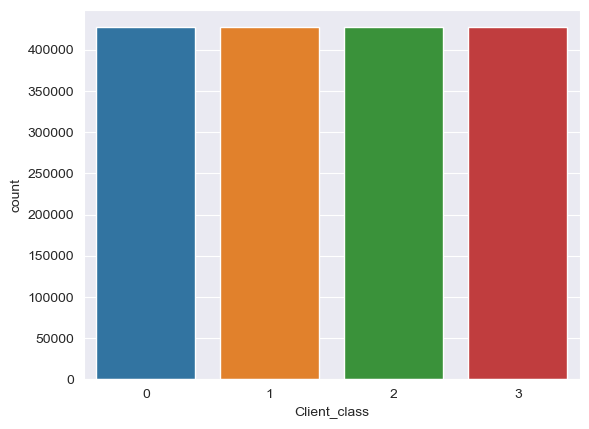

In [80]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);

In [81]:
#Определяем столбцы для удаления

columns_to_drop = ['volume_commitment', 'type_debt', 'days_overdue', 'surety_period', 'mark_kind'] 
df = df.drop(columns_to_drop, axis=1)

# Выводим измененный DataFrame
print("\nDataFrame после удаления столбцов:")
df.head()



DataFrame после удаления столбцов:


,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,period_interest,psk,balance,current_indebtedness,expired,next_payment,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.0,RUB,КредитнаяКарта,Активный,8/22/2039,NaN,0.0,141531.65,0.0,0.0,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,1/15/2015,NaN,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.0,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,NaN,0.0,268860.28,0.0,0.0,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,3240.15,6/18/2018,NaN,168000.0,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,NaN,40.998,39779.33,0.0,0.0,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,12/17/2015,NaN,29356.04,False,0
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.0,RUB,Потребительский,СчетЗакрыт,11/14/2016,NaN,0.0,0.0,0.0,0.0,0.0,10/13/2016,10/13/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,1157.42,10/13/2016,NaN,0.0,False,0
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.0,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,NaN,29.768,186130.59,0.0,0.0,0.0,8/16/2021,10/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,10/1/2021,NaN,128642.19,False,0


In [82]:
#Определяем столбцы для удаления

columns_to_drop = ['period_interest','beginning_days_delinquency_counting', 'next_payment'] 
df = df.drop(columns_to_drop, axis=1)

# Выводим измененный DataFrame
print("\nDataFrame после удаления столбцов:")
df



DataFrame после удаления столбцов:


,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,5/27/2006,0.0,RUB,КредитнаяКарта,Активный,8/22/2039,0.0,141531.65,0.0,0.0,1/15/2015,8/16/2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,1/15/2015,140070.97,False,0
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,6/6/2013,168000.0,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,6/18/2018,0.0,268860.28,0.0,0.0,6/18/2018,6/20/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,3240.15,6/18/2018,168000.0,False,0
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/18/2014,29356.04,RUB,Потребительский,СчетЗакрыт,12/17/2015,40.998,39779.33,0.0,0.0,12/17/2015,12/30/2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,12/17/2015,29356.04,False,0
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,11/13/2015,15620.0,RUB,Потребительский,СчетЗакрыт,11/14/2016,0.0,0.0,0.0,0.0,10/13/2016,10/13/2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,1157.42,10/13/2016,0.0,False,0
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,10/17/2022,11/19/2022,Архангельская область,г. Северодвинск,182291.0,10/29/1981,Женский,NaN,сотрудники крупного бизнеса,2022-10-17 00:00:00,1d0284ca-4e32-11ed-b80c-3cfdfed12971,12/7/2015,32000.0,RUB,КредитнаяКарта,СчетЗакрыт,10/1/2021,29.768,186130.59,0.0,0.0,8/16/2021,10/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.0,10/1/2021,128642.19,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708707,961a3ba0-e0de-469f-bbd6-20ef0b7e9a9e,f26c83c0-cff3-11ed-b820-3cfdfed12dbc,2023-03-31,NaN,Архангельская область,г. Северодвинск,182291.0,1990-03-27,Мужской,NaN,рабочий,2023-03-31,bc5ad954-cff2-11ed-b80d-3cfdfed12971,2022-08-02,5000.0,RUB,Микрокредит,СчетЗакрыт,2022-08-23 00:00:00,365.0,6102.73,0.0,0.0,2022-08-24,2022-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,МФО,0.0,2022-08-25,5000.0,0.0,3
1708708,961a3ba0-e0de-469f-bbd6-20ef0b7e9a9e,f26c83c0-cff3-11ed-b820-3cfdfed12dbc,2023-03-31,NaN,Архангельская область,г. Северодвинск,182291.0,1990-03-27,Мужской,NaN,рабочий,2023-03-31,bc5ad954-cff2-11ed-b80d-3cfdfed12971,2022-08-03,6000.0,RUB,Микрокредит,СчетЗакрыт,2022-08-24 00:00:00,361.0,6000.0,0.0,0.0,2022-08-23,2022-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,МФО,0.0,2022-08-23,6000.0,0.0,3
1708709,961a3ba0-e0de-469f-bbd6-20ef0b7e9a9e,f26c83c0-cff3-11ed-b820-3cfdfed12dbc,2023-03-31,NaN,Архангельская область,г. Северодвинск,182291.0,1990-03-27,Мужской,NaN,рабочий,2023-03-31,bc5ad954-cff2-11ed-b80d-3cfdfed12971,2022-08-08,7000.0,RUB,Микрокредит,СчетЗакрыт,2022-09-06 00:00:00,0.0,7000.0,0.0,0.0,2022-09-02,2022-09-02,0.0,

owner_id                                0.0
contract_id                             0.0
issue_dt                                0.0
close_dt                               37.0
region_name                             0.0
city_name                               0.0
population                              0.0
date_of_birth                           0.0
gender                                  0.0
education                              20.0
position                                4.0
dt_nbki                                 0.0
id_nbki                                 0.0
issued                                  0.0
amount                                  0.0
currency                                0.0
type_credit                             0.0
status_credit                           0.0
period                                  0.0
psk                                     0.0
balance                                 0.0
current_indebtedness                    0.0
expired                         

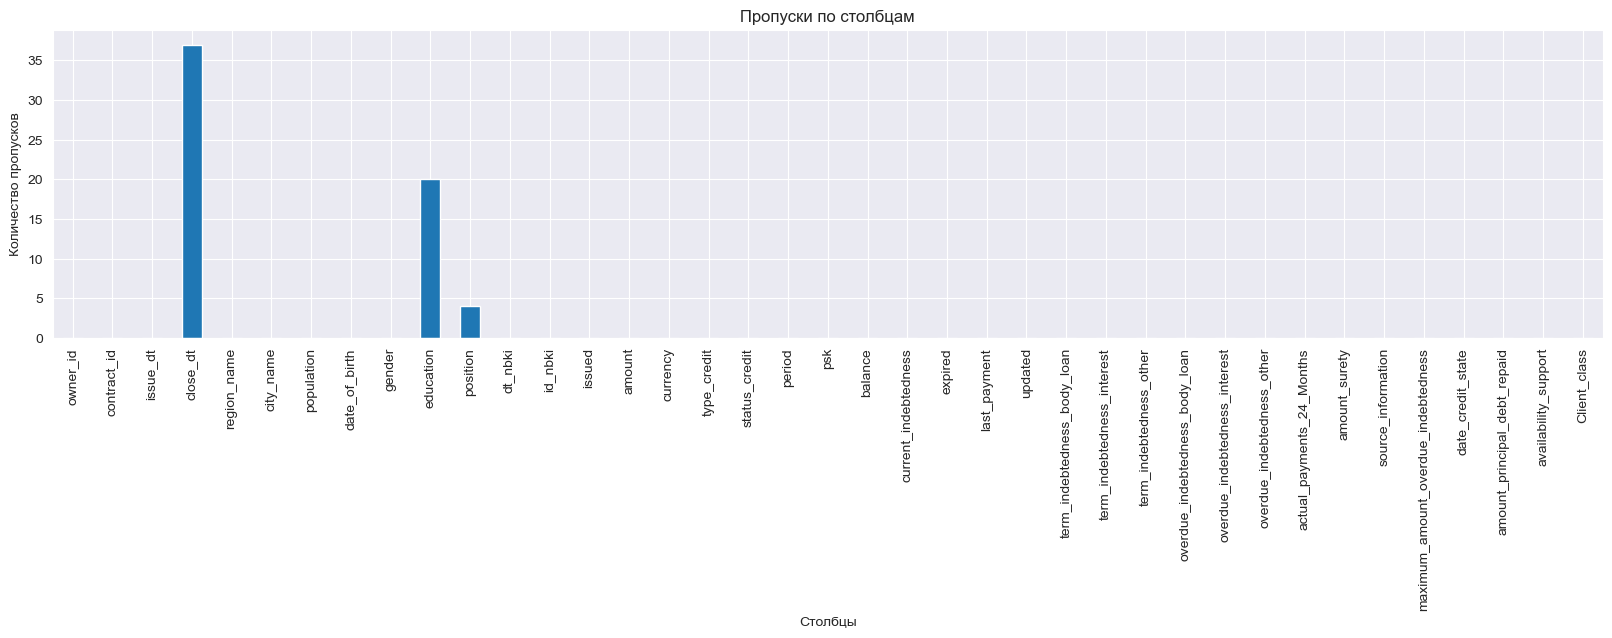

In [83]:
missing_percentages = round(df.isnull().mean() * 100)
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

### Сохранение баз

In [84]:
df.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_all_balance.scv', index=False)

In [90]:
# сохранение train выборки
df_train.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_train_bal.csv', index=False)

In [91]:
# сохранение train выборки
df_val.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_val_bal.csv', index=False)

In [89]:
# сохранение train выборки
df_test.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_test_bal.csv', index=False)

### Деление на train, val, test выборки

In [85]:
#test
def split(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_test = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_test


df_train, df_test = split(df, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 28974               | 5794              | (1360801, 39) | (347911, 39) |
+-----------+---------------------+-------------------+---------------+--------------+



In [86]:
#val
def split1(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_val = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_val


df_train, df_val = split1(df_train, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Val          |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 23180               | 4636              | (1092550, 39) | (268251, 39) |
+-----------+---------------------+-------------------+---------------+--------------+



In [87]:
print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(1708712, 39)
(1092550, 39)
(268251, 39)
(347911, 39)


0    427178
1    427178
2    427178
3    427178
Name: Client_class, dtype: int64


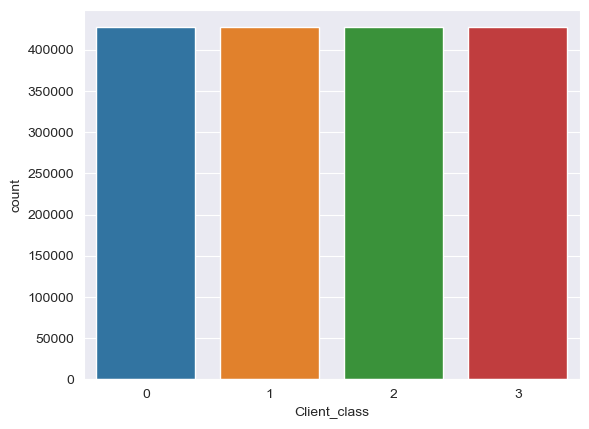

In [88]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);